# Info
Name:  

    NAAMES_cld_comp

Purpose:  

    To compare the various cloud properties retrieved via different methods from NAAMES.
    Looking at the Nov. 17th, 2015 case
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - load_modis.py : for loading modis files
    - matplotlib
    - numpy
    - scipy : for saving and reading
    - math
    - os
    - gc
    - pdb
    - datetime
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - 20151117_zen_cld_retrieved.mat: cloud retrieval file
  - MYD06_L2.A2015321.1540.006.2015322185040.hdf: MODIS file
  
Modification History:

    Written: Samuel LeBlanc, NASA Ames, Santa Cruz, CA, 2016-03-24
    Modified: 

# Import initial modules and default paths

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import scipy.io as sio
import Sp_parameters as Sp
import hdf5storage as hs
import load_modis as lm

In [2]:
from mpl_toolkits.basemap import Basemap,cm

In [3]:
import write_utils as wu

In [4]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [5]:
# set the basic directory path
fp='C:/Users/sleblan2/Research/NAAMES/'

# Load the various data

## Load the retrieved cloud properties from 4STAR

In [6]:
star = hs.loadmat(fp+'retrieve/20151117_zen_cld_retrieved.mat')

In [7]:
star.keys()

[u'tau', u'utc', u'ki', u'sza', u'lon', u'lat', u'phase', u'alt', u'ref']

<IPython.core.display.Javascript object>


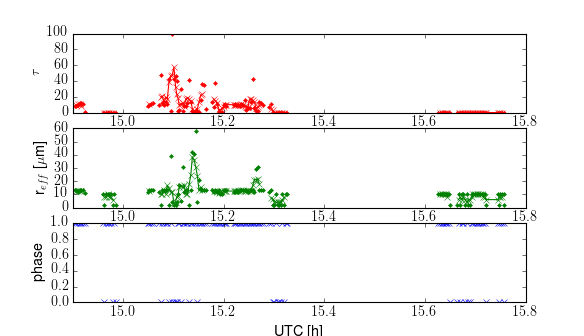

In [7]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(star['utc'],star['tau'],'r.')
plt.plot(star['utc'],Sp.smooth(star['tau'],4,nan=False),'-xr')
plt.ylabel('$\\tau$')
plt.subplot(3,1,2)
plt.plot(star['utc'],star['ref'],'g.')
plt.plot(star['utc'],Sp.smooth(star['ref'],4,nan=False),'-xg')
plt.ylabel('r$_{eff}$ [$\\mu$m]')
plt.subplot(3,1,3)
plt.plot(star['utc'],star['phase'],'x')
plt.ylabel('phase')
plt.xlabel('UTC [h]')

In [8]:
star['tau'] = Sp.smooth(star['tau'],4,nan=False)
star['ref'] = Sp.smooth(star['ref'],4,nan=False)

In [20]:
star['tau'][star['tau']<1.0]=np.nan

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


## Load the MODIS file

In [9]:
myd3 = fp+'c130/20151117_flt/MYD03.A2015321.1540.006.2015322160400.hdf'
myd6 = fp+'c130/20151117_flt/MYD06_L2.A2015321.1540.006.2015322185040.hdf'

In [10]:
modis,modis_dicts = lm.load_modis(myd3,myd6)

Outputting the Geo subdatasets:
0: [4060x2708] Scan Offset MODIS_Swath_Type_GEO (8-bit integer)
1: [4060x2708] Track Offset MODIS_Swath_Type_GEO (8-bit integer)
2: [4060x2708] Height Offset MODIS_Swath_Type_GEO (8-bit integer)
3: [2030x1354] Height MODIS_Swath_Type_GEO (16-bit integer)
4: [2030x1354] SensorZenith MODIS_Swath_Type_GEO (16-bit integer)
5: [2030x1354] SensorAzimuth MODIS_Swath_Type_GEO (16-bit integer)
6: [2030x1354] Range MODIS_Swath_Type_GEO (16-bit unsigned integer)
7: [2030x1354] SolarZenith MODIS_Swath_Type_GEO (16-bit integer)
8: [2030x1354] SolarAzimuth MODIS_Swath_Type_GEO (16-bit integer)
9: [2030x1354] Land/SeaMask MODIS_Swath_Type_GEO (8-bit unsigned integer)
10: [2030x1354] WaterPresent MODIS_Swath_Type_GEO (8-bit unsigned integer)
11: [2030x1354] gflags MODIS_Swath_Type_GEO (8-bit unsigned integer)
12: [2030x1354] Latitude (32-bit floating-point)
13: [2030x1354] Longitude (32-bit floating-point)
14: [4060x2708] Scan Offset (8-bit integer)
15: [4060x2708] Trac

## Load the insitu probe liquid vs ice water content

In [12]:
help(lm.load_ict)

Help on function load_ict in module load_modis:

load_ict(fname, return_header=False, make_nan=True)
    Simple ict file loader
    created specifically to load the files from the iwg1 on board the G1 during TCAP, may work with others...
    inputs:
       fname: filename with full path
       return_header: (default set to False) if True, returns data, header in that form
       make_nan: (default set to True) if True, the values defined in the header to be missing data, usually -999, is changed to NaNs



In [13]:
wf = fp+'c130/20151117_flt/NAAMES-LARGE-WCM_C130_20151117_RA.ict'
wcm,wcm_head = lm.load_ict(wf,return_header=True)

('Date_UTC', 'TWC_gm_3', 'LWC1_gm_3', 'LWC2_gm_3')


<IPython.core.display.Javascript object>


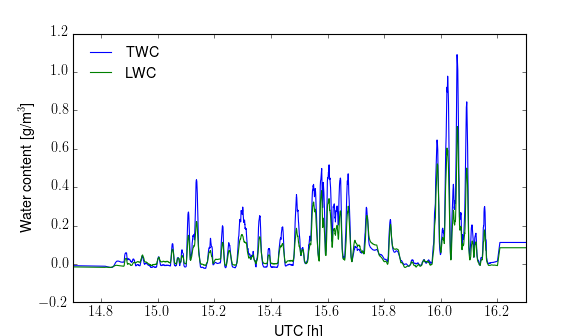

In [14]:
plt.figure()
plt.plot(wcm['Date_UTC']/3600,Sp.smooth(wcm['TWC_gm_3'],30),label='TWC')
plt.plot(wcm['Date_UTC']/3600,Sp.smooth(wcm['LWC1_gm_3'],30),label='LWC')
plt.ylabel('Water content [g/m$^3$]')
plt.xlabel('UTC [h]')
plt.xlim([14.7,16.3])
plt.legend(frameon=False,loc=2)

# Start plotting MODIS and the retrieved values

In [15]:
#set up a easy plotting function
def naames_map(ax=plt.gca()):
    m = Basemap(projection='stere',lon_0=-40,lat_0=50,
            llcrnrlon=-42, llcrnrlat=48,
            urcrnrlon=-37, urcrnrlat=52,resolution='h',ax=ax)
    m.drawcoastlines()
    #m.fillcontinents(color='#AAAAAA')
    m.drawstates()
    m.drawcountries()
    m.drawmeridians(np.linspace(-35,-45,11),labels=[0,0,0,1])
    m.drawparallels(np.linspace(45,55,11),labels=[1,0,0,0])
    return m

<IPython.core.display.Javascript object>


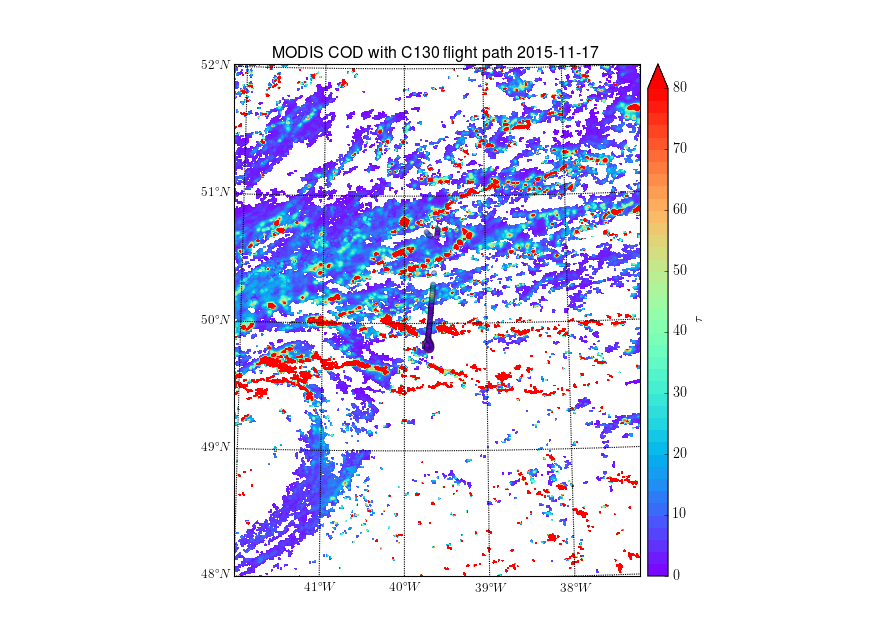

In [21]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = naames_map(ax)
x,y = m(modis['lon'],modis['lat'])
clevels = np.linspace(0,80,41)

plt.title('MODIS COD with C130 flight path 2015-11-17')
cs1 = m.contourf(x,y,modis['tau'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('$\\tau$')

xx,yy = m(star['lon'],star['lat'])
m.scatter(xx,yy,c=star['tau'],cmap=plt.cm.rainbow,marker='o',vmin=clevels[0],vmax=clevels[-1],
          alpha=0.5,edgecolors='k',linewidth=0.65)
plt.savefig(fp+'plot/20151117_MODIS_4STAR_map_COD.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


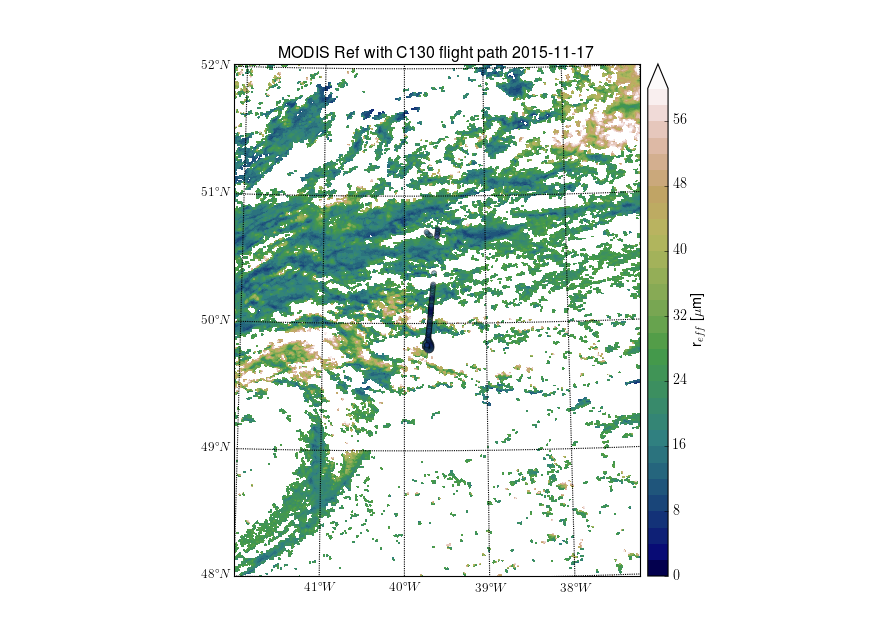

In [22]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = naames_map(ax)
x,y = m(modis['lon'],modis['lat'])
clevels = np.linspace(0,60,31)
plt.title('MODIS Ref with C130 flight path 2015-11-17')
cs1 = m.contourf(x,y,modis['ref'],clevels,cmap=plt.cm.gist_earth,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('r$_{eff}$ [$\\mu$m]')

xx,yy = m(star['lon'],star['lat'])
m.scatter(xx,yy,c=star['ref'],cmap=plt.cm.gist_earth,marker='o',vmin=clevels[0],vmax=clevels[-1],
          alpha=0.5,edgecolors='k',linewidth=0.65)
plt.savefig(fp+'plot/20151117_MODIS_4STAR_map_ref.png',dpi=600,transparent=True)

In [36]:
modis_dicts['phase']

{'ALGORITHMPACKAGEACCEPTANCEDATE': 'June 1997',
 'ALGORITHMPACKAGEMATURITYCODE': 'at-launch',
 'ALGORITHMPACKAGENAME': 'ATBD-MOD-04 and ATBD-MOD-05',
 'ALGORITHMPACKAGEVERSION': '2',
 'ALGORITHM_VERSION_CLOUD_PHASE_IR': '1',
 'ALGORITHM_VERSION_CLOUD_PROPERTY_VIS': '1',
 'ALGORITHM_VERSION_CLOUD_TOP_PROPERTY_IR': '1',
 'ANCILLARYINPUTPOINTER': 'MYD03.A2015321.1540.006.2015322160400.hdf',
 'ANCILLARYINPUTTYPE': 'Geolocation',
 'ASSOCIATEDINSTRUMENTSHORTNAME': 'MODIS',
 'ASSOCIATEDPLATFORMSHORTNAME': 'Aqua',
 'ASSOCIATEDSENSORSHORTNAME': 'MODIS',
 'AUTOMATICQUALITYFLAG': 'Passed',
 'AUTOMATICQUALITYFLAGEXPLANATION': 'Passed: >10% useable; Failed: <10% useable',
 'Cell_Across_Swath_Sampling': '1, 1354, 1',
 'Cell_Along_Swath_Sampling': '1, 2030, 1',
 'CirrusCloudDetectedPct_IR': '   41.25',
 'Clear_Sky_Restoral_Status': 'y',
 'CloudPhaseUncertainPct_IR': '   35.02',
 'Collection_4_Phase_Used': 'n',
 'DAYNIGHTFLAG': 'Day',
 'DESCRREVISION': '6.0',
 'EASTBOUNDINGCOORDINATE': '-24.3883177545

<IPython.core.display.Javascript object>


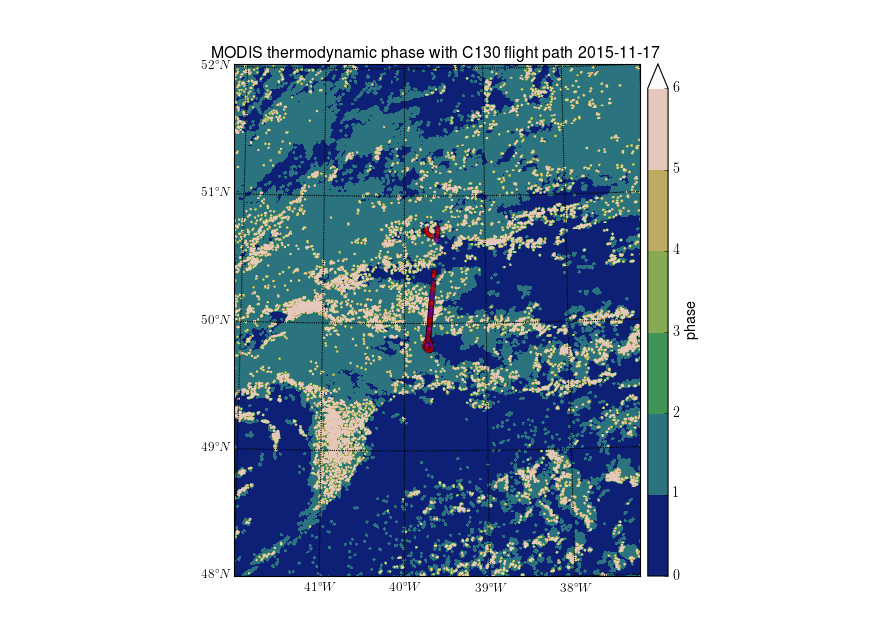

In [23]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = naames_map(ax)
x,y = m(modis['lon'],modis['lat'])
clevels = np.linspace(0,6,7)
plt.title('MODIS thermodynamic phase with C130 flight path 2015-11-17')
cs1 = m.contourf(x,y,modis['phase'],clevels,cmap=plt.cm.gist_earth,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('phase')

xx,yy = m(star['lon'],star['lat'])
m.scatter(xx,yy,c=star['phase'],cmap=plt.cm.rainbow,marker='o',vmin=0,vmax=1,
          alpha=0.5,edgecolors='k',linewidth=0.65)

plt.savefig(fp+'plot/20151117_MODIS_4STAR_map_phase.png',dpi=600,transparent=True)

## Subset the MODIS values to match the flight path

In [11]:
import map_utils as mu

In [12]:
mod_ind = mu.map_ind(modis['lon'],modis['lat'],star['lon'],star['lat'])

Running through flight track: [########################################]100% -- Done! 


In [13]:
mod_ind.shape

(2L, 340L)

In [14]:
modis['lat'].shape

(2030L, 1354L)

In [15]:
star['lat'].shape

(340L, 1L)

In [189]:
star['tau'][star['tau']<1.0] = np.nan

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


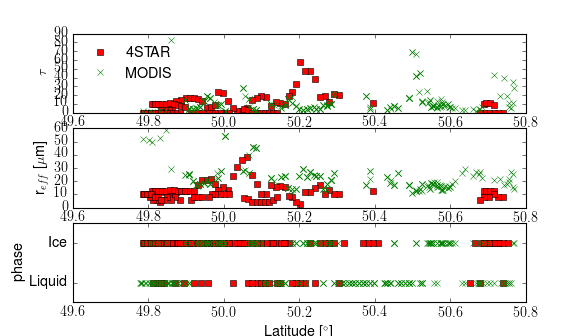

In [16]:
plt.figure()
ax = plt.subplot(3,1,1)
plt.plot(star['lat'],star['tau'],'rs',label='4STAR')
plt.plot(modis['lat'][mod_ind[0,:],mod_ind[1,:]],modis['tau'][mod_ind[0,:],mod_ind[1,:]],'gx',label='MODIS')
plt.legend(frameon=False,numpoints=1,loc=0)
plt.ylabel('$\\tau$')
plt.subplot(3,1,2,sharex=ax)
plt.plot(star['lat'],star['ref'],'rs')
plt.plot(modis['lat'][mod_ind[0,:],mod_ind[1,:]],modis['ref'][mod_ind[0,:],mod_ind[1,:]],'gx',label='MODIS')
plt.ylabel('r$_{eff}$ [$\\mu$m]')
ax3 = plt.subplot(3,1,3,sharex=ax)
plt.plot(star['lat'],star['phase'],'rs')
plt.plot(modis['lat'][mod_ind[0,:],mod_ind[1,:]],modis['phase'][mod_ind[0,:],mod_ind[1,:]]-1,'gx',label='MODIS')
plt.ylim([-0.5,1.5])
plt.yticks([0,1])
ax3.set_yticklabels(['Liquid','Ice'])
plt.ylabel('phase')
plt.xlabel('Latitude [$^\circ$]')
plt.savefig(fp+'plot/20151117_cld_retr_vs_MODIS.png',transparent=True,dpi=600)

## Now compare MODIS vs. 4STAR with bean plots

In [17]:
import plotting_utils as pu

<IPython.core.display.Javascript object>


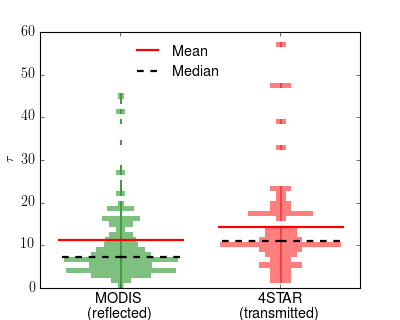

In [21]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[0,60],xlim=[-0.5,1.5])
ax1.set_ylabel('$\\tau$')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['MODIS\n(reflected)','4STAR\n(transmitted)'])
pu.plot_vert_hist(fig,ax1,modis['tau'][mod_ind[0,:],mod_ind[1,:]],0,[0,60],legend=True,onlyhist=False,loc=2,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,star['tau'],1,[0,60],legend=True,color='r',bins=50)
plt.savefig(fp+'plot/20151117_COD_bean_modis_4star.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


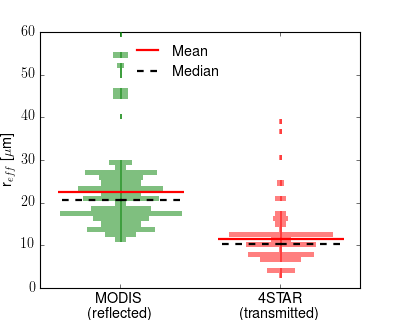

In [19]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[0,60],xlim=[-0.5,1.5])
ax1.set_ylabel('r$_{eff}$ [$\\mu$m]')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['MODIS\n(reflected)','4STAR\n(transmitted)'])
pu.plot_vert_hist(fig,ax1,modis['ref'][mod_ind[0,:],mod_ind[1,:]],0,[0,60],legend=True,onlyhist=False,loc=2,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,star['ref'],1,[0,60],legend=True,color='r',bins=50)
plt.savefig(fp+'plot/20151117_ref_bean_modis_4star.png',transparent=True,dpi=600)

# Now prepare a subsection of retrieved values to be saved in ict

## create the dicts for writing to ict

In [60]:
star.keys()

[u'tau', u'utc', u'ki', u'sza', u'lon', u'lat', u'phase', u'alt', u'ref']

In [22]:
d_dict =  {'utc':{'data':star['utc'],'unit':'hours from midnight UTC',
                     'long_description':'Fractional hours starting a midnight, continuous'},
          'COD':{'data':star['tau'],'unit':'None','format':'.1f',
                 'long_description':'Cloud Optical Depth of the cloud above the Aircraft'},
          'REF':{'data':star['ref'],'unit':'microns','format':'.1f',
                 'long_description':'Cloud particle effective radius, pertains to liquid cloud drops and ice crystals'},
          'PHASE':{'data':star['phase'],'unit':'None','format':'.0f',
                   'long_description':'Thermodynamic phase of cloud above, 0: pure liquid cloud, 1: pure ice cloud, mixed phase not retrieved'},
          'LAT':{'data':star['lat'],'unit':'Degrees','format':'.6f',
                 'long_description':'Aircraft position latitude (North positive)'},
          'LON':{'data':star['lon'],'unit':'Degrees','format':'.6f',
                 'long_description':'Aircraft position longitude (East positive)'},
          'ALT':{'data':star['alt'],'unit':'meter','format':'.1f',
                 'long_description':'Aircraft altitude'},
          'SZA':{'data':star['sza'],'unit':'Degrees','format':'.2f',
                 'long_description':'Solar Zenith Angle, angle of the sun between it and zenith'}
          }

In [23]:
h_dict ={'PI':'Jens Redemann',
         'Institution':'NASA Ames Research Center',
         'Instrument':'4STAR',
         'campaign':'NAAMES #1',
         'special_comments':'Preliminary retrieved cloud properties data',
         'PI_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
         'platform':'C130',
         'location':"based out of St-John's, NL, Canada, actual location of C130 described by lat and lon below",
         'instrument_info':'Retrieved products from the 4STAR zenith radiance measurements',
         'data_info':'For references see LeBlanc et al.(2015) AMT, doi:10.5194/amt-8-1361-2015',
         'time_interval':10.0,
         'uncertainty':'Preliminary 7% in REF and 5% in COD',
         'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
         'project_info':'NAAMES field mission',
         'stipulations':'Prior OK from PI',
         'rev_comments':"""RA: preliminary retrieved values, may be subject to multiple errors
    including due to clouds influencing presumed surface albedo, non-homogeneous clouds, or mixed phase clouds"""
        }

In [24]:
order=['LAT','LON','ALT','SZA','COD','REF','PHASE']

## Verify the input, plot and write the file. Subset only valid time.

In [25]:
data_dict = wu.prep_data_for_ict(d_dict,Start_UTC=15.04,End_UTC=15.34,time_interval=10.0)

In [26]:
data_dict.keys()

['Start_UTC', 'SZA', 'LON', 'LAT', 'COD', 'PHASE', 'ALT', 'REF']

<IPython.core.display.Javascript object>


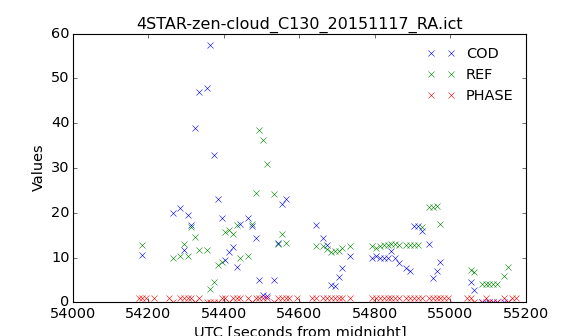

plotting the togethers


<IPython.core.display.Javascript object>


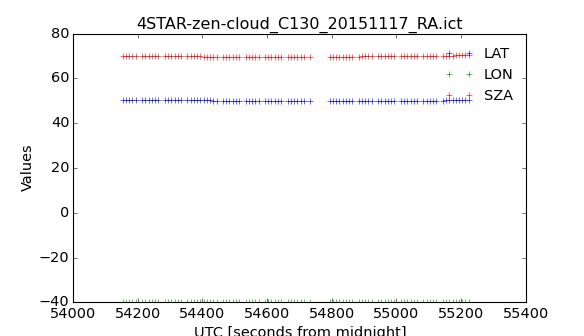

plotting the togethers 2


<IPython.core.display.Javascript object>


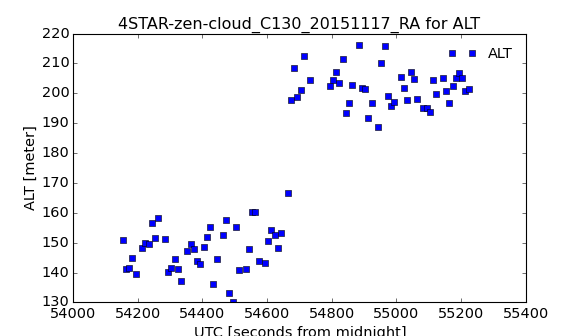

plotting ALT


In [154]:
wu.make_plots_ict(data_dict,filepath=fp+'plot/',data_id='4STAR-zen-cloud',loc_id='C130',date='20151117',rev='RA',
                  plot_together=['COD','REF','PHASE'],plot_together2=['LAT','LON','SZA'])

In [245]:
wu.write_ict(h_dict,data_dict,filepath=fp,data_id='4STAR-zen-cloud',loc_id='C130',date='20151117',rev='RA',order=order)

LAT
LON
ALT
SZA
COD
REF
PHASE
File writing successful to: C:/Users/sleblan2/Research/NAAMES/4STAR-zen-cloud_C130_20151117_RA.ict


## Now prepare the same values but from MODIS

In [27]:
md_dict =  {'utc':{'data':star['utc'],'unit':'hours from midnight UTC',
                     'long_description':'Fractional hours starting a midnight, continuous'},
          'COD':{'data':modis['tau'][mod_ind[0,:],mod_ind[1,:]],'unit':'None','format':'.1f',
                 'long_description':'Cloud Optical Depth from MODIS'},
          'REF':{'data':modis['ref'][mod_ind[0,:],mod_ind[1,:]],'unit':'microns','format':'.1f',
                 'long_description':'Cloud particle effective radius, pertains to liquid cloud drops and ice crystals'},
          'PHASE':{'data':modis['phase'][mod_ind[0,:],mod_ind[1,:]],'unit':'None','format':'.0f',
                   'long_description':'Thermodynamic phase of cloud,'+\
                   ' 0 -- cloud free, 1 -- water cloud, 2 -- ice cloud, 3 -- mixed phase cloud, 6 -- undetermined phase'},
          'LAT':{'data':modis['lat'][mod_ind[0,:],mod_ind[1,:]],'unit':'Degrees','format':'.6f',
                 'long_description':'MODIS linked to Aircraft position latitude (North positive)'},
          'LON':{'data':modis['lon'][mod_ind[0,:],mod_ind[1,:]],'unit':'Degrees','format':'.6f',
                 'long_description':'MODIS linked to Aircraft position longitude (East positive)'},
          'SZA':{'data':star['sza'],'unit':'Degrees','format':'.2f',
                 'long_description':'Solar Zenith Angle, angle of the sun between it and zenith'}
          }

In [28]:
mh_dict ={'PI':'Samuel LeBlanc',
         'Institution':'NASA Ames Research Center',
         'Instrument':'MODIS',
         'campaign':'NAAMES #1',
         'special_comments':'MODIS retrieved cloud values linked along C130 flight path',
         'PI_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
         'platform':'C130',
         'location':"based out of St-John's, NL, Canada, actual location of C130 described by lat and lon below",
         'instrument_info':'Retrieved products from the MODIS, MYD06_L2.A2015321.1540.006.2015322185040.hdf',
         'data_info':'For references see LeBlanc et al.(2015) AMT, doi:10.5194/amt-8-1361-2015',
         'time_interval':10.0,
         'uncertainty':'N\A',
         'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
         'project_info':'NAAMES field mission',
         'stipulations':'Prior OK from PI',
         'rev_comments':"""RA: initial go at this, for radiative transfer calculations"""
        }

In [29]:
order=['LAT','LON','SZA','COD','REF','PHASE']

In [30]:
mdata_dict = wu.prep_data_for_ict(md_dict,Start_UTC=15.04,End_UTC=15.34,time_interval=10.0)

In [250]:
wu.write_ict(mh_dict,mdata_dict,filepath=fp,data_id='MODIS-cloud-to-C130',loc_id='C130',date='20151117',rev='RA',order=order)

LAT
LON
SZA
COD
REF
PHASE
File writing successful to: C:/Users/sleblan2/Research/NAAMES/MODIS-cloud-to-C130_C130_20151117_RA.ict


# Prepare input files for radiative transfer

In [33]:
import Run_libradtran as Rl

## Prepare the defaults

In [226]:
from datetime import datetime
datetime(2015,11,17).timetuple().tm_yday

321

In [227]:
geo = {'lat':47.6212167,'lon':52.74245,'doy':321,'zout':[0,100.0]}
aero = {} # none
cloud = {'ztop':2.5,'zbot':2.0,'write_moments_file':False}
source = {'wvl_range':[201.0,4000.0],'source':'solar','integrate_values':True,'run_fuliou':True,
          'dat_path':'/u/sleblan2/libradtran/libRadtran-2.0-beta/data/'}
albedo = {'create_albedo_file':False,'sea_surface_albedo':True,'wind_speed':10.0}

In [ ]:
cloud['phase'] = 'wc'
geo['sza'] = 40.0
cloud['tau'] = 2.0
cloud['ref'] = 5.0

In [232]:
phase_star = {0:'wc',1:'ic'}

In [233]:
phase_modis = {0:'wc',1:'wc',2:'ic',3:'ic',6:'wc'}

## Make the runs for 4STAR

In [251]:
data_dict['COD']['data']

array([    nan,     nan,     nan,     nan,  10.5  ,     nan,     nan,
           nan,     nan,     nan,     nan,     nan,  20.   ,     nan,
        21.   ,  11.75 ,  19.5  ,  17.375,  38.875,  46.875,     nan,
        47.875,  57.5  ,  32.875,  23.   ,  18.75 ,   9.375,  11.25 ,
        12.375,   7.875,  17.5  ,     nan,  18.75 ,  17.125,  14.375,
         5.   ,   1.575,   1.325,     nan,   5.075,  13.2  ,  21.875,
        23.   ,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,  17.25 ,     nan,  14.375,  12.8  ,   3.8  ,   3.55 ,
         5.675,   7.75 ,     nan,  10.25 ,     nan,     nan,     nan,
           nan,     nan,  10.   ,  10.25 ,  10.   ,  10.   ,  10.   ,
        11.5  ,  10.   ,   8.75 ,     nan,   7.75 ,   7.   ,  17.   ,
        17.   ,  15.875,     nan,  13.   ,   5.5  ,   7.   ,   9.125,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
         4.55 ,   2.825,     nan,     nan,     nan,     nan,     nan,
           nan,     

In [252]:
data_dict['PHASE']['data']

array([ nan,  nan,  nan,   1.,   1.,   1.,  nan,   1.,  nan,  nan,  nan,
         1.,   0.,  nan,   1.,   1.,   1.,   1.,   0.,   1.,  nan,   0.,
         0.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   1.,  nan,   1.,
         0.,   1.,   1.,   1.,   1.,  nan,   0.,   1.,   1.,   1.,   1.,
        nan,   1.,  nan,  nan,  nan,   1.,   1.,  nan,   1.,   1.,   1.,
         1.,   1.,   1.,  nan,   1.,  nan,  nan,  nan,  nan,  nan,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,  nan,   1.,   1.,   1.,
         1.,   1.,  nan,   1.,   1.,   1.,   1.,   1.,   1.,  nan,  nan,
        nan,  nan,   1.,   1.,   0.,  nan,   0.,   1.,   0.,   0.,   0.,
        nan,   1.,   0.,   1.,   1.,  nan,  nan,  nan,  nan,  nan])

In [253]:
data_dict['REF']['data']

array([   nan,    nan,    nan,    nan,  12.75,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,  10.  ,    nan,  10.25,  13.  ,
        10.25,  16.75,  14.5 ,  11.75,    nan,  11.75,   3.  ,   4.5 ,
         8.25,   9.  ,  15.75,  16.25,  15.25,  17.25,  10.  ,    nan,
        10.25,  17.5 ,  24.5 ,  38.5 ,  36.25,  31.  ,    nan,  24.25,
        13.  ,  15.25,  13.25,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,  12.5 ,    nan,  12.5 ,  12.  ,  11.25,  11.5 ,
        11.5 ,  12.25,    nan,  12.5 ,    nan,    nan,    nan,    nan,
          nan,  12.5 ,  12.25,  12.5 ,  12.75,  12.75,  13.  ,  13.  ,
        12.75,    nan,  12.75,  12.75,  12.75,  12.75,  16.75,    nan,
        21.25,  21.25,  21.5 ,  17.5 ,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,   7.25,   6.75,    nan,   4.  ,   4.  ,
         4.  ,   4.  ,   4.  ,    nan,   6.  ,   8.  ,    nan,    nan,
          nan,    nan,    nan,    nan,    nan])

In [269]:
# open the list file
f = open(fp+'rtm/NAAMES_20151117_CRE.sh','w')
fpp_in = '/nobackup/sleblan2/rtm/input/NAAMES_CRE_20151117/'
fpp_out = '/nobackup/sleblan2/rtm/output/NAAMES_CRE_20151117/'
fp_uv = '/u/sleblan2/libradtran/libRadtran-2.0-beta/bin/uvspec'
fp_in = fp+'rtm/input/CRE/'

In [270]:
for i,l in enumerate(data_dict['LAT']['data']):
    if l<-100.: # for only valid values
        continue
    if not np.isfinite(data_dict['PHASE']['data'][i]) or not np.isfinite(data_dict['COD']['data'][i]):
        continue
    print i
    
    f_in = 'NAAMES_v1_star_{:03d}.dat'.format(i)
    geo['lat'],geo['lon'],geo['sza'] = l,data_dict['LON']['data'][i],data_dict['SZA']['data'][i]
    cloud['tau'],cloud['ref'] = data_dict['COD']['data'][i],data_dict['REF']['data'][i]
    cloud['phase'] = phase_star[data_dict['PHASE']['data'][i]]
    Rl.write_input_aac(fp_in+f_in,geo=geo,aero=aero,cloud=cloud,source=source,albedo=albedo,
                               verbose=False,make_base=False,set_quiet=True)
    f.write('{uv} < {fin} > {out}\n'.format(uv=fp_uv,fin=fpp_in+f_in,out=fpp_out+f_in))
    
    f_in = 'NAAMES_v1_star_{:03d}_clear.dat'.format(i)
    cloud['tau'] = 0.0
    Rl.write_input_aac(fp_in+f_in,geo=geo,aero=aero,cloud=cloud,source=source,albedo=albedo,
                               verbose=False,make_base=False,set_quiet=True)
    f.write('{uv} < {fin} > {out}\n'.format(uv=fp_uv,fin=fpp_in+f_in,out=fpp_out+f_in))
f.close()

4
12
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
30
32
33
34
35
36
37
39
40
41
42
50
52
53
54
55
56
57
59
65
66
67
68
69
70
71
72
74
75
76
77
78
80
81
82
83
91
92


C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


## Make the runs for MODIS

In [271]:
# open the list file
fm = open(fp+'rtm/NAAMES_20151117_CRE_modis.sh','w')
fpp_in = '/nobackup/sleblan2/rtm/input/NAAMES_CRE_20151117/'
fpp_out = '/nobackup/sleblan2/rtm/output/NAAMES_CRE_20151117/'
fp_uv = '/u/sleblan2/libradtran/libRadtran-2.0-beta/bin/uvspec'
fp_in = fp+'rtm/input/CRE/'

In [272]:
for i,l in enumerate(mdata_dict['LAT']['data']):
    if l<-100.: # for only valid values
        continue
    if not np.isfinite(mdata_dict['PHASE']['data'][i]) or not np.isfinite(mdata_dict['COD']['data'][i]):
        continue
    print i
    
    f_in = 'NAAMES_v1_modis_{:03d}.dat'.format(i)
    geo['lat'],geo['lon'],geo['sza'] = l,mdata_dict['LON']['data'][i],mdata_dict['SZA']['data'][i]
    cloud['tau'],cloud['ref'] = mdata_dict['COD']['data'][i],mdata_dict['REF']['data'][i]
    cloud['phase'] = phase_modis[mdata_dict['PHASE']['data'][i]]
    Rl.write_input_aac(fp_in+f_in,geo=geo,aero=aero,cloud=cloud,source=source,albedo=albedo,
                               verbose=False,make_base=False,set_quiet=True)
    fm.write('{uv} < {fin} > {out}\n'.format(uv=fp_uv,fin=fpp_in+f_in,out=fpp_out+f_in))
    
    f_in = 'NAAMES_v1_modis_{:03d}_clear.dat'.format(i)
    cloud['tau'] = 0.0
    Rl.write_input_aac(fp_in+f_in,geo=geo,aero=aero,cloud=cloud,source=source,albedo=albedo,
                               verbose=False,make_base=False,set_quiet=True)
    fm.write('{uv} < {fin} > {out}\n'.format(uv=fp_uv,fin=fpp_in+f_in,out=fpp_out+f_in))
fm.close()

4
12
14
15
16
17
18
19
21
22
23
24
25
26
28
32
33
34
35
40
41
42
43
45
46
47
48
55
65
66
68
71
76
77
78
80
81
82
83
84
85
87
92
94
95
96
100
103
104
105
106
107
108


C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


# Read the output files (after running on pleaides) and get CRE

## Read the files

In [31]:
nstar = len(data_dict['LAT']['data'])
nmodis = len(mdata_dict['LAT']['data'])
star_CRE = {'dn':np.zeros((nstar,2))+np.nan,'up':np.zeros((nstar,2))+np.nan}
star_CRE_clear = {'dn':np.zeros((nstar,2))+np.nan,'up':np.zeros((nstar,2))+np.nan}
modis_CRE = {'dn':np.zeros((nmodis,2))+np.nan,'up':np.zeros((nmodis,2))+np.nan}
modis_CRE_clear = {'dn':np.zeros((nmodis,2))+np.nan,'up':np.zeros((nmodis,2))+np.nan}
star_C = np.zeros((nstar,2))+np.nan
modis_C = np.zeros((nmodis,2))+np.nan

In [34]:
print 'MODIS'
for i,l in enumerate(mdata_dict['LAT']['data']):
    if l<-100.: # for only valid values
        continue
    if not np.isfinite(mdata_dict['PHASE']['data'][i]) or not np.isfinite(mdata_dict['COD']['data'][i]):
        continue
    print '\r{}..'.format(i)
    f_in = 'NAAMES_v1_modis_{:03d}.dat'.format(i)
    s = Rl.read_libradtran(fp+'rtm/output/CRE/'+f_in,zout=[0,100])
    f_in = 'NAAMES_v1_modis_{:03d}_clear.dat'.format(i)
    sc = Rl.read_libradtran(fp+'rtm/output/CRE/'+f_in,zout=[0,100])
    
    modis_CRE['dn'][i,:] = s['diffuse_down']+s['direct_down']
    modis_CRE_clear['dn'][i,:] = sc['diffuse_down']+sc['direct_down']
    modis_CRE['up'][i,:] = s['diffuse_up']
    modis_CRE_clear['up'][i,:] = sc['diffuse_up']
    modis_C[i,:] = (modis_CRE['dn'][i,:]-modis_CRE['up'][i,:]) - (modis_CRE_clear['dn'][i,:]-modis_CRE_clear['up'][i,:])

MODIS
4..
12..
14..
15..
16..
17..
18..
19..
21..
22..
23..
24..
25..
26..
28..
32..
33..
34..
35..
40..
41..
42..
43..
45..
46..
47..
48..
55..
65..
66..
68..
71..
76..
77..
78..
80..
81..
82..
83..
84..
85..
87..
92..
94..
95..
96..
100..
103..
104..
105..
106..
107..
108..


C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


In [35]:
print '4STAR'
for i,l in enumerate(data_dict['LAT']['data']):
    if l<-100.: # for only valid values
        continue
    if not np.isfinite(data_dict['PHASE']['data'][i]) or not np.isfinite(data_dict['COD']['data'][i]):
        continue
    print '\r{}..'.format(i)
    f_in = 'NAAMES_v1_star_{:03d}.dat'.format(i)
    s = Rl.read_libradtran(fp+'rtm/output/CRE/'+f_in,zout=[0,100])
    f_in = 'NAAMES_v1_star_{:03d}_clear.dat'.format(i)
    sc = Rl.read_libradtran(fp+'rtm/output/CRE/'+f_in,zout=[0,100])
    
    star_CRE['dn'][i,:] = s['diffuse_down']+s['direct_down']
    star_CRE_clear['dn'][i,:] = sc['diffuse_down']+sc['direct_down']
    star_CRE['up'][i,:] = s['diffuse_up']
    star_CRE_clear['up'][i,:] = sc['diffuse_up']
    star_C[i,:] = (star_CRE['dn'][i,:]-star_CRE['up'][i,:]) - (star_CRE_clear['dn'][i,:]-star_CRE_clear['up'][i,:])

4STAR
4..
12..
14..
15..
16..
17..
18..
19..
21..
22..
23..
24..
25..
26..
27..
28..
29..
30..
32..
33..
34..
35..
36..
37..
39..
40..
41..
42..
50..
52..
53..
54..
55..
56..
57..
59..
65..
66..
67..
68..
69..
70..
71..
72..
74..
75..
76..
77..
78..
80..
81..
82..
83..
91..
92..


C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


In [301]:
star_CRE

{'dn': array([[          nan,           nan],
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan],
        [  98.39539   ,  481.16823595],
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan],
        [  83.25565   ,  482.30003652],
        [          nan,           nan],
        [  59.45315   ,  482.46863688],
        [  91.53443   ,  482.63943612],
        [  63.18097   ,  482.8091368 ],
        [  69.22213   ,  482.97423662],
        [  50.86608   ,  483.11673729],
        [  29.13541   ,  483.28173762],
        [          nan,           nan],
        [  41.57224   ,  483.44433751],
        [  27.26632   ,  483.60683787],
        [  49.62674   ,  483.77333734],
        [  73.84207   ,  483.87303

## Present CRE

In [302]:
star_C

array([[          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [-218.425782  , -209.81833527],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [-233.53963   , -226.98490469],
       [          nan,           nan],
       [-255.982727  , -245.57538439],
       [-226.067899  , -216.44416516],
       [-252.770643  , -242.72639448],
       [-247.267799  , -232.23246466],
       [-264.58566   , -249.46612402],
       [-285.03782   , -270.01379369],
       [          nan,           nan],
       [-273.554504  , -259.67577379],
       [-287.063577  , -285.93187344],
       [-266.271132  , -264.30698396],
       [-243.663192  , -238.01930449],
       [-253.072806  , -2

In [303]:
modis_C

array([[          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [-132.73686889, -127.05323698],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [-236.47103   , -218.33790465],
       [          nan,           nan],
       [-216.312716  , -202.41588541],
       [-168.55491389, -163.12386623],
       [-164.63158757, -154.84879657],
       [-153.66671367, -144.83036685],
       [-170.80549245, -158.9529265 ],
       [-158.6461586 , -149.68689674],
       [          nan,           nan],
       [-150.32089311, -139.54317693],
       [-196.39863689, -188.97077585],
       [-249.499329  , -238.2102846 ],
       [-216.331447  , -207.72390515],
       [-176.15518199, -1

<IPython.core.display.Javascript object>


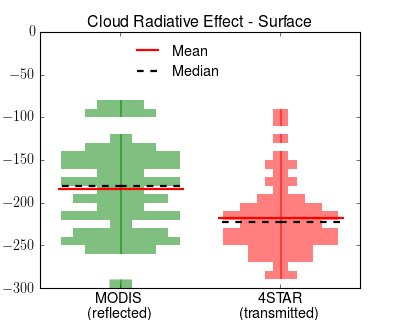

In [41]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-300,0],xlim=[-0.5,1.5])
ax1.set_ylabel('Cloud Radiative Effect [W/m$^2$]')
ax1.set_title('Cloud Radiative Effect - Surface')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['MODIS\n(reflected)','4STAR\n(transmitted)'])
pu.plot_vert_hist(fig,ax1,modis_C[:,0],0,[-300,0],legend=True,onlyhist=False,loc=2,color='g',bins=30)
pu.plot_vert_hist(fig,ax1,star_C[:,0],1,[-300,0],legend=True,color='r',bins=30)
plt.savefig(fp+'plot/20151117_surface_CRE_modis_4STAR.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


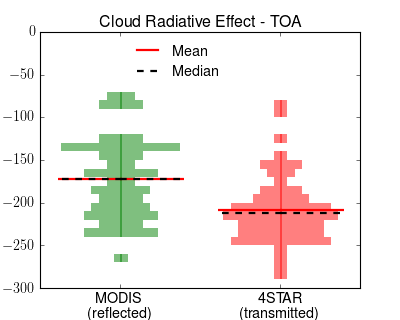

In [40]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-300,0],xlim=[-0.5,1.5])
ax1.set_ylabel('Cloud Radiative Effect [W/m$^2$]')
ax1.set_title('Cloud Radiative Effect - TOA')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['MODIS\n(reflected)','4STAR\n(transmitted)'])
pu.plot_vert_hist(fig,ax1,modis_C[:,1],0,[-300,0],legend=True,onlyhist=False,loc=2,color='g',bins=30)
pu.plot_vert_hist(fig,ax1,star_C[:,1],1,[-300,0],legend=True,color='r',bins=30)
plt.savefig(fp+'plot/20151117_toa_CRE_modis_4STAR.png',transparent=True,dpi=600)

## Calculate the relative CRE and plot it

In [42]:
modis_rC = np.zeros_like(modis_C)
star_rC = np.zeros_like(star_C)

In [43]:
modis_rC[:,0] = modis_C[:,0]/modis_CRE['dn'][:,1]*100.0
star_rC[:,0] = star_C[:,0]/star_CRE['dn'][:,1]*100.0
modis_rC[:,1] = modis_C[:,1]/modis_CRE['dn'][:,1]*100.0
star_rC[:,1] = star_C[:,1]/star_CRE['dn'][:,1]*100.0

<IPython.core.display.Javascript object>


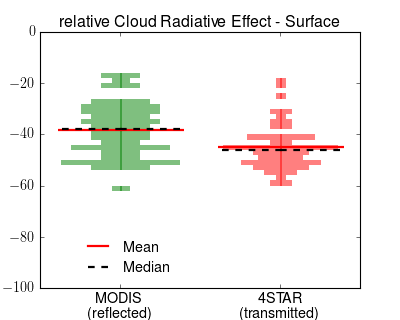

In [47]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-100,0],xlim=[-0.5,1.5])
ax1.set_ylabel('relative Cloud Radiative Effect [\%]')
ax1.set_title('relative Cloud Radiative Effect - Surface')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['MODIS\n(reflected)','4STAR\n(transmitted)'])
pu.plot_vert_hist(fig,ax1,modis_rC[:,0],0,[-100,0],legend=True,onlyhist=False,loc=4,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,star_rC[:,0],1,[-100,0],legend=True,color='r',bins=50)
plt.savefig(fp+'plot/20151117_surface_rCRE_modis_4STAR.png',transparent=True,dpi=600)

In [48]:
np.nanmean(modis_rC[:,0]),np.nanmean(star_rC[:,0])

(-38.258361004540518, -45.038011230987898)

In [51]:
np.nanstd(modis_rC[:,0]), np.nanstd(star_rC[:,0])

(10.328311579862529, 8.6292488844561817)

<IPython.core.display.Javascript object>


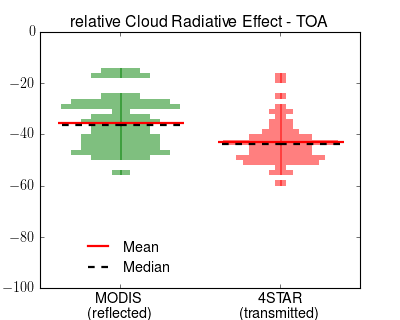

In [45]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-100,0],xlim=[-0.5,1.5])
ax1.set_ylabel('relative Cloud Radiative Effect [%]')
ax1.set_title('relative Cloud Radiative Effect - TOA')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['MODIS\n(reflected)','4STAR\n(transmitted)'])
pu.plot_vert_hist(fig,ax1,modis_rC[:,1],0,[-100,0],legend=True,onlyhist=False,loc=4,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,star_rC[:,1],1,[-100,0],legend=True,color='r',bins=50)
plt.savefig(fp+'plot/20151117_TOA_rCRE_modis_4STAR.png',transparent=True,dpi=600)